In [31]:
# Importing all the required libraries for analysis

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Reading the dataset file and checking the size of file

data=pd.read_csv(r'C:\Users\richa\Desktop\Models\Air-Passengers-Time-Series-Analysis\Data\AirPassengers.csv')
data.shape

(144, 2)

In [36]:
# Creating the 'Date' as Index for data and viewing the dataset

data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


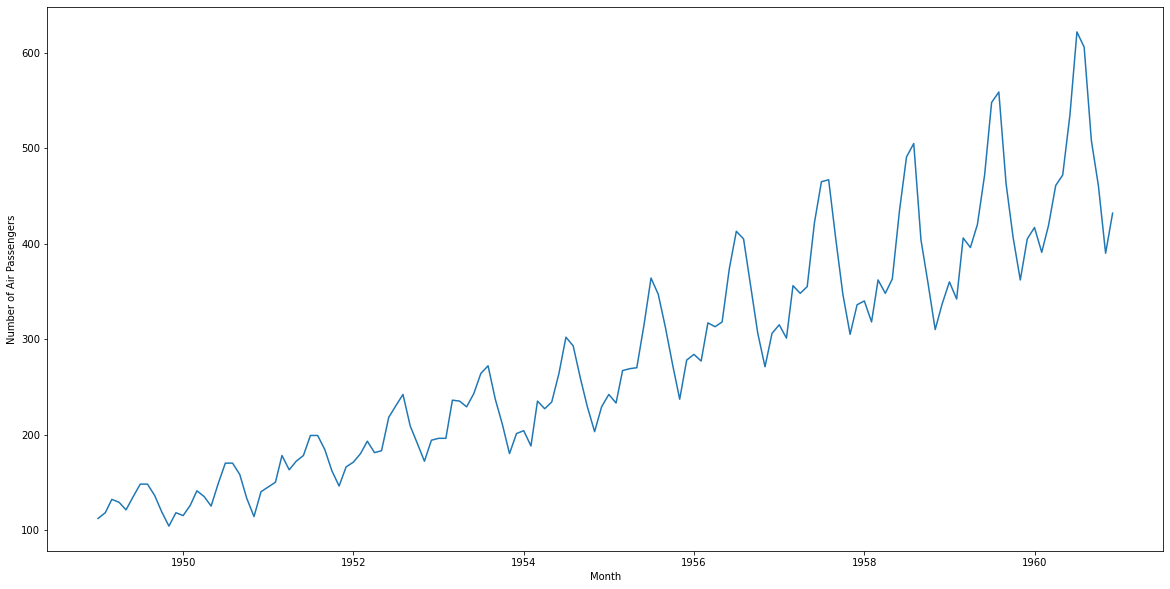

In [37]:
# Visualizing the Time Series plot for the number of Air Passengers 

plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [38]:
# As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
# Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977


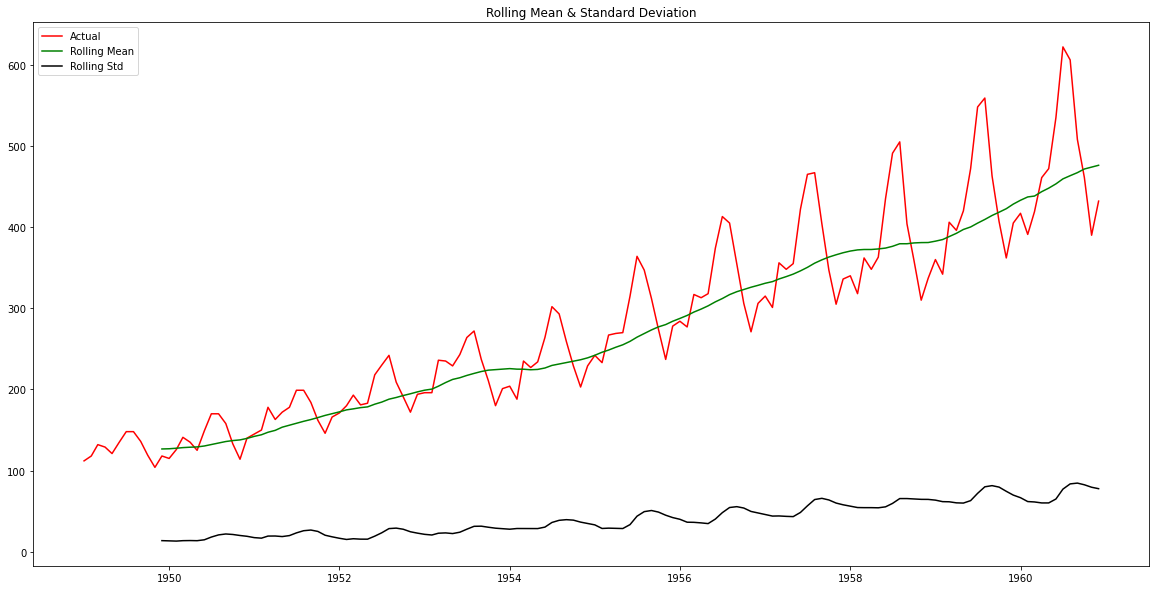

In [39]:
#  Plotting the Rolling Mean and Standard Deviation, which has window of 12
# By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [40]:
# Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
# ADF has : 
# <b>Null hypothesis         - Time Series is non-stationary</b>

from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


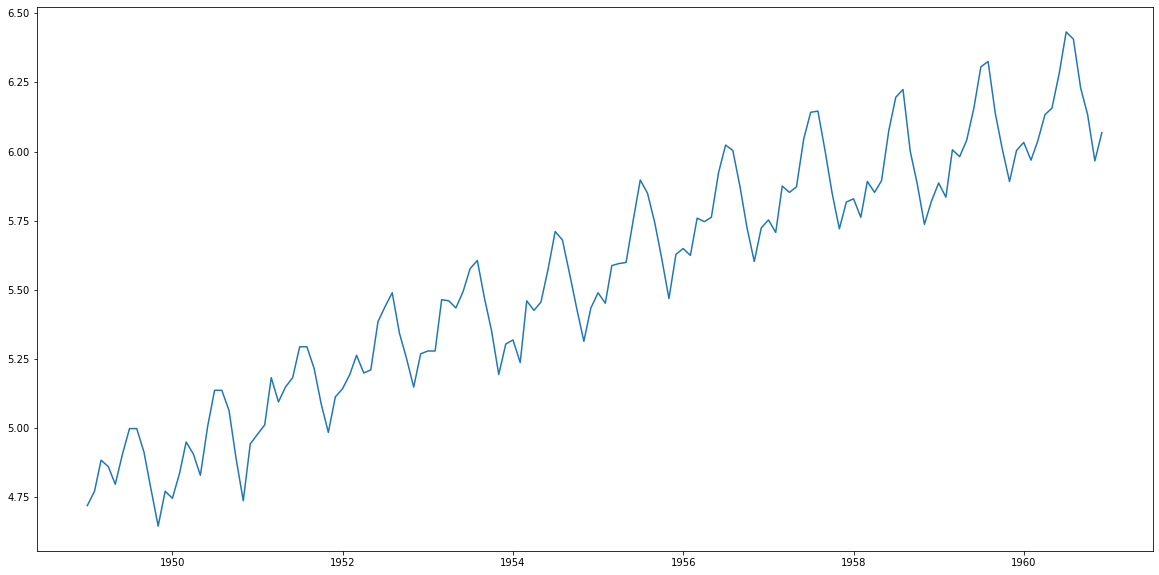

In [41]:
# Below we took log transformation to make our Time series stationary and plotted visual for it
# We found graph upward trending over time with seasonality 

plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

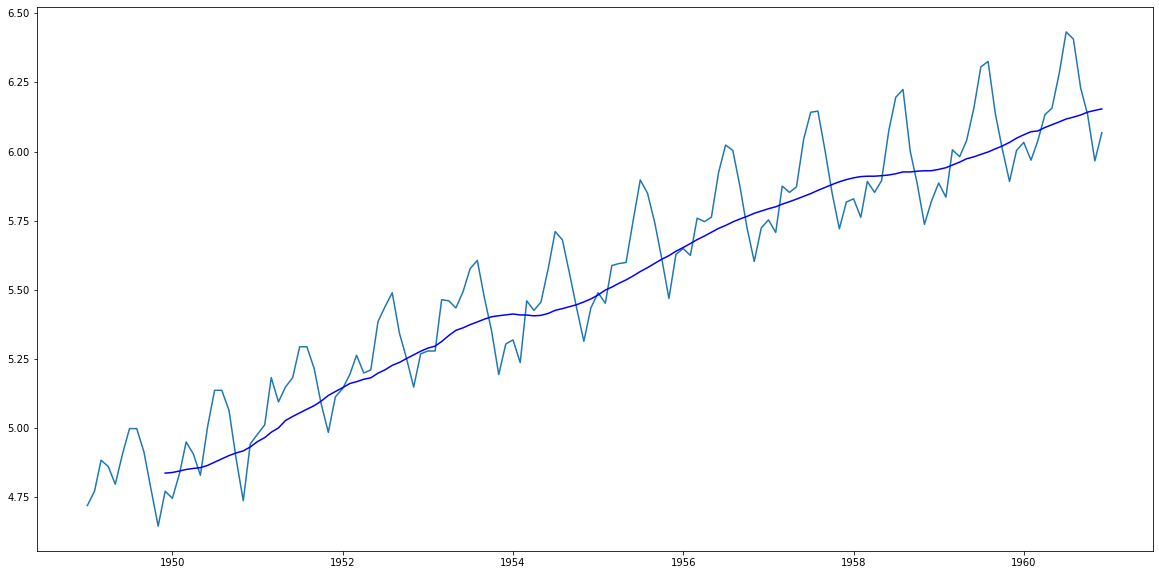

In [42]:
# Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [43]:
# Using another method differencing, to make our time series stationary

data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [44]:
# Output of differencing method, after dropping null values

data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [45]:
# Defining function for Rolling Mean and Standard Deviation & ADF test

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

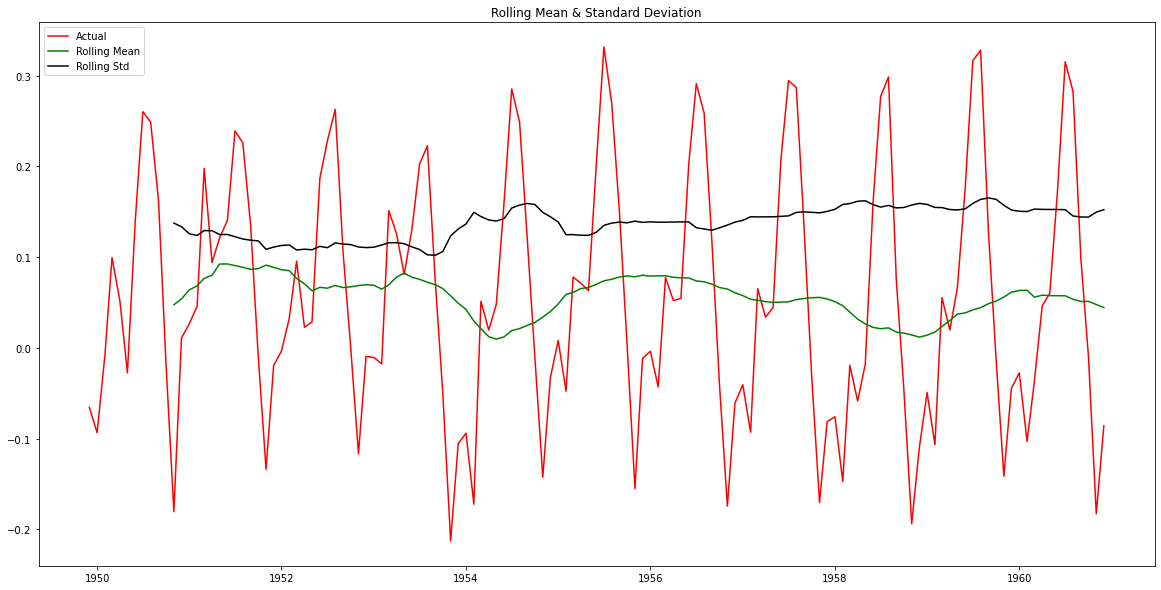

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [46]:
stationarity(data_log_diff)

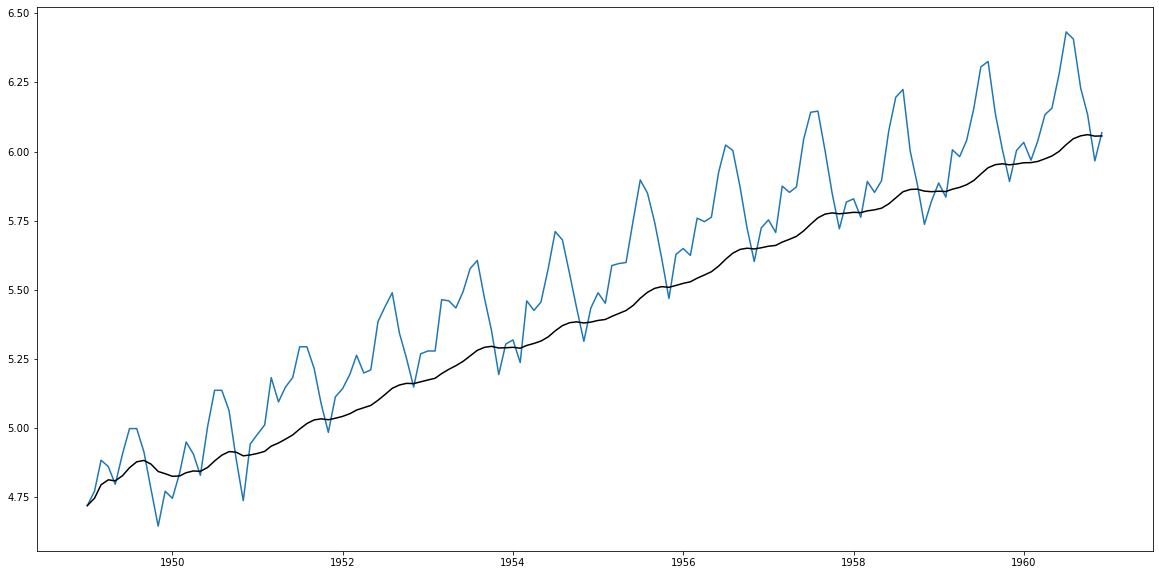

In [47]:
# Checking for Trend stationarity and performing exponential transformation on our data

plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

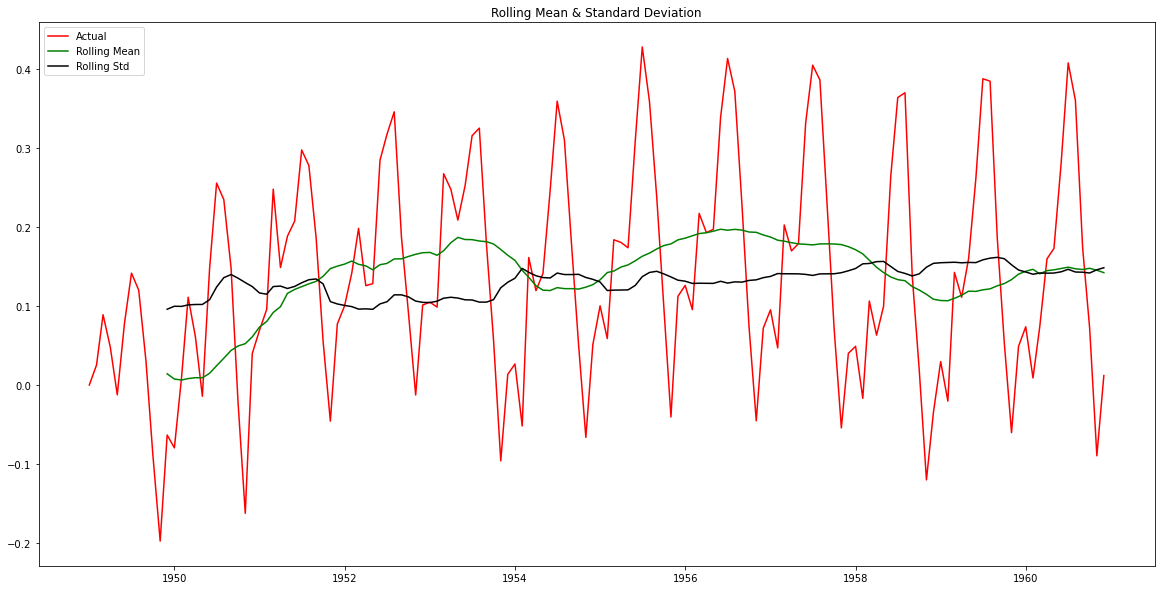

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [48]:
# Since log transformation is non-stationary, applying differencing on our data.

exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

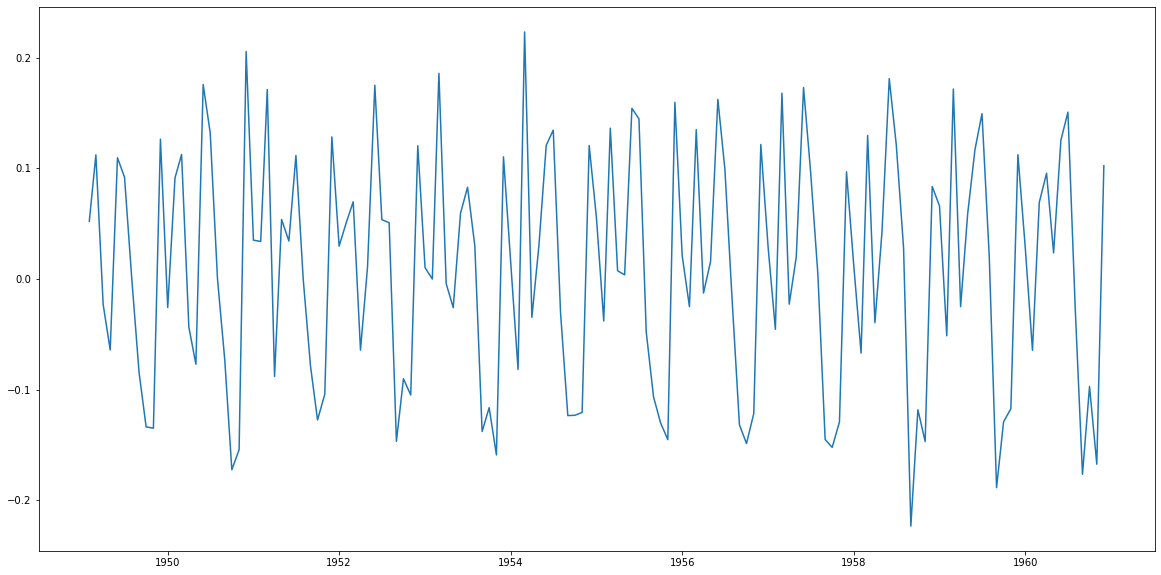

In [19]:
# From above graph and ADF test, we conclude, it is trend stationary

plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

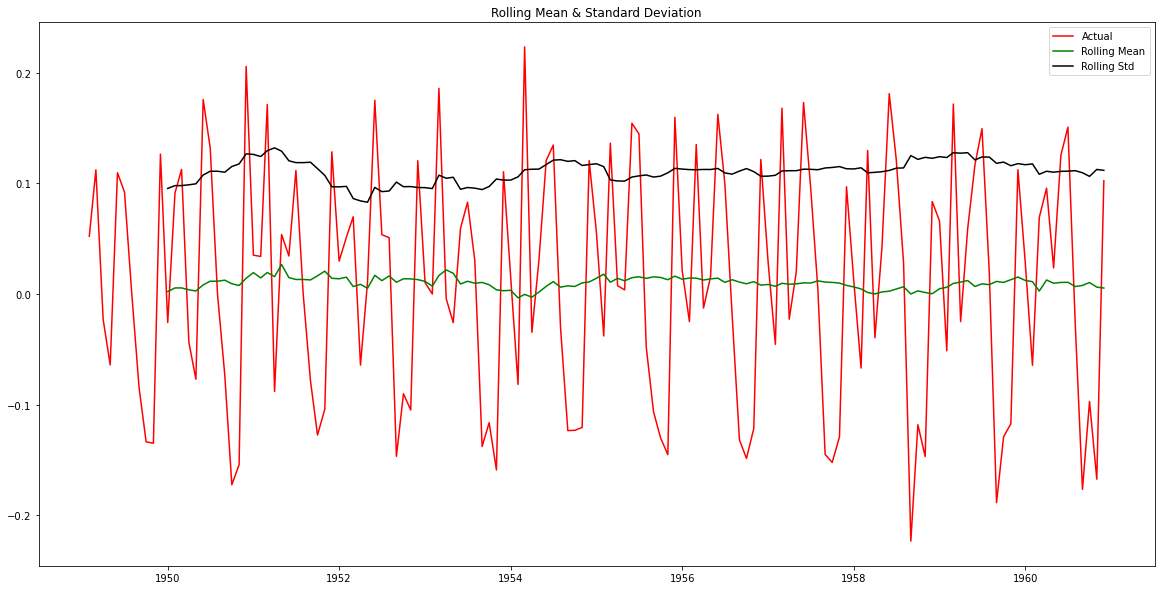

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [20]:
data_shift=data_shift.dropna()
stationarity(data_shift)

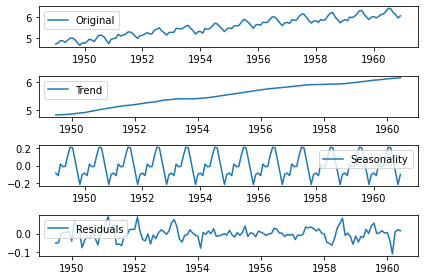

In [49]:
# Decomposing Time Series into its components : Trend, Seasonality and Residual

from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

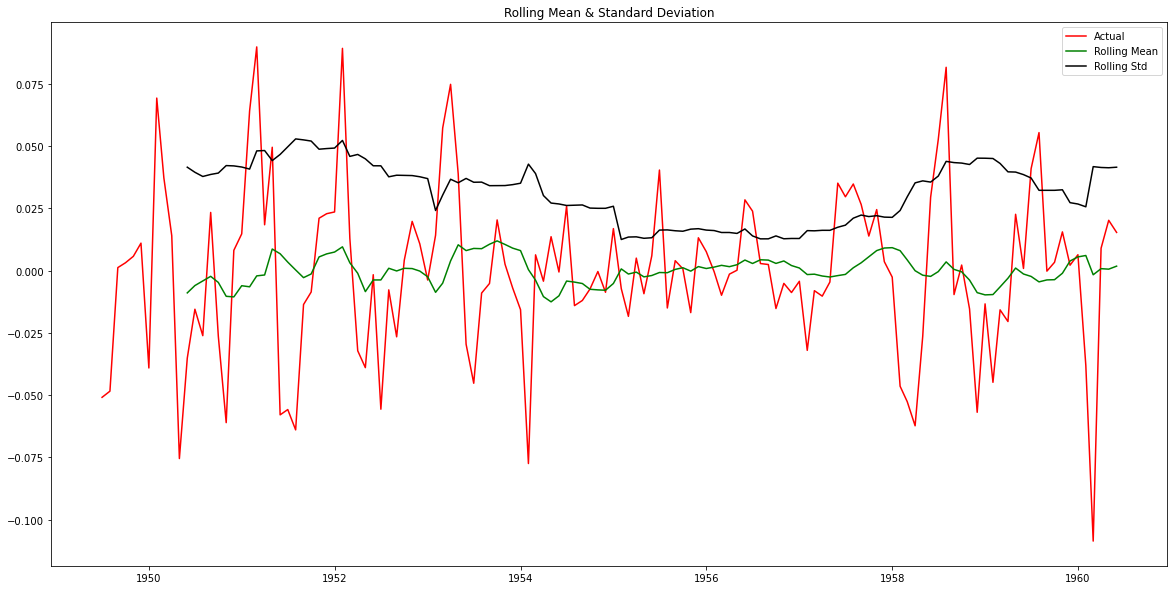

Dickey-Fuller Test: 


KeyError: 'Passengers'

In [50]:
# Checking the stationarity of Time Series components

decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Autocorrelation Function')

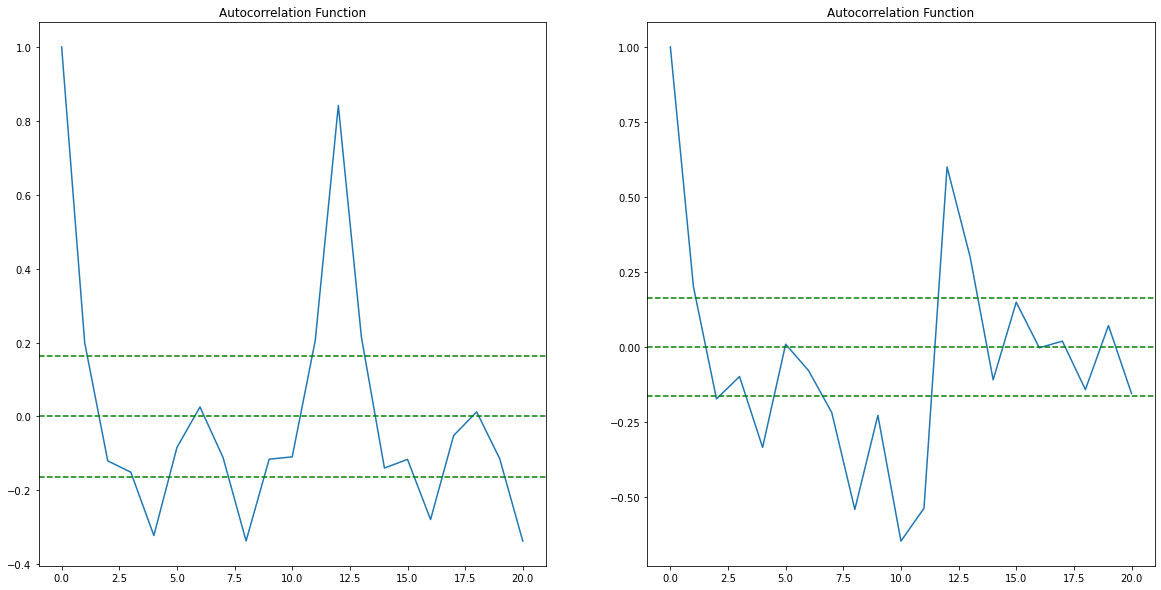

In [23]:
#- Plotting the ACF and PACF to find q and p value
# We got q and p both 2 from the graph

from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plotting ARIMA model


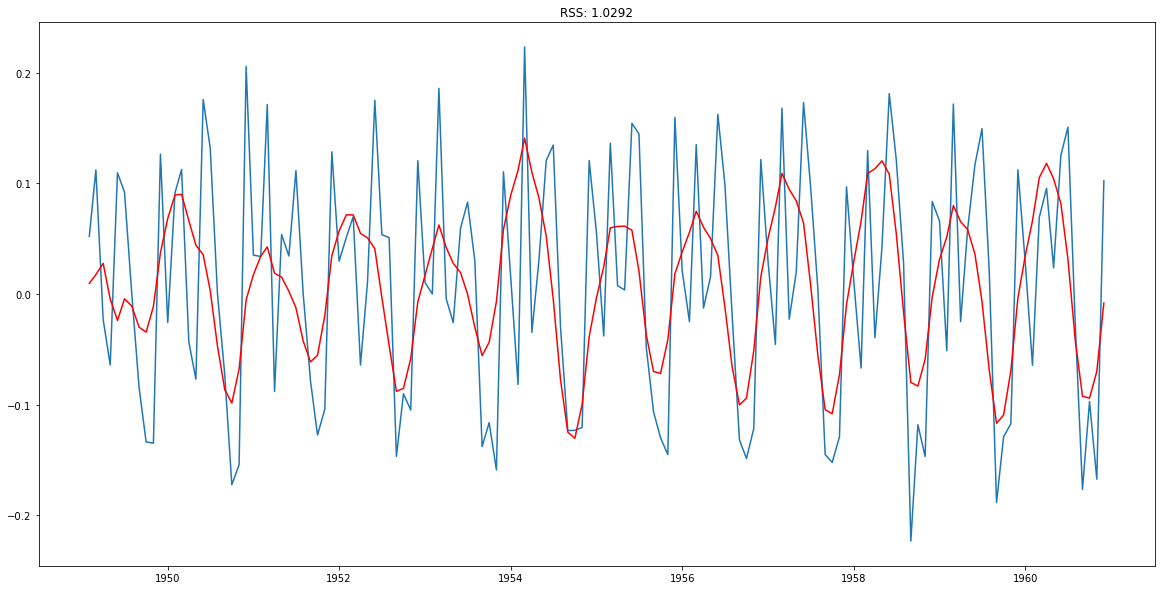

In [51]:
# Building the ARIMA model with p=2, q=2 and I=1

from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [52]:
# Predicted values from ARIMA model in difference form

predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [53]:
# Performing Inverse Transformation for differencing, by doing cumulative sum

predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [58]:
# Performing Inverse Transformation for differencing, by doing cumulative sum

predictions_log=pd.Series(data_log['Passengers'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

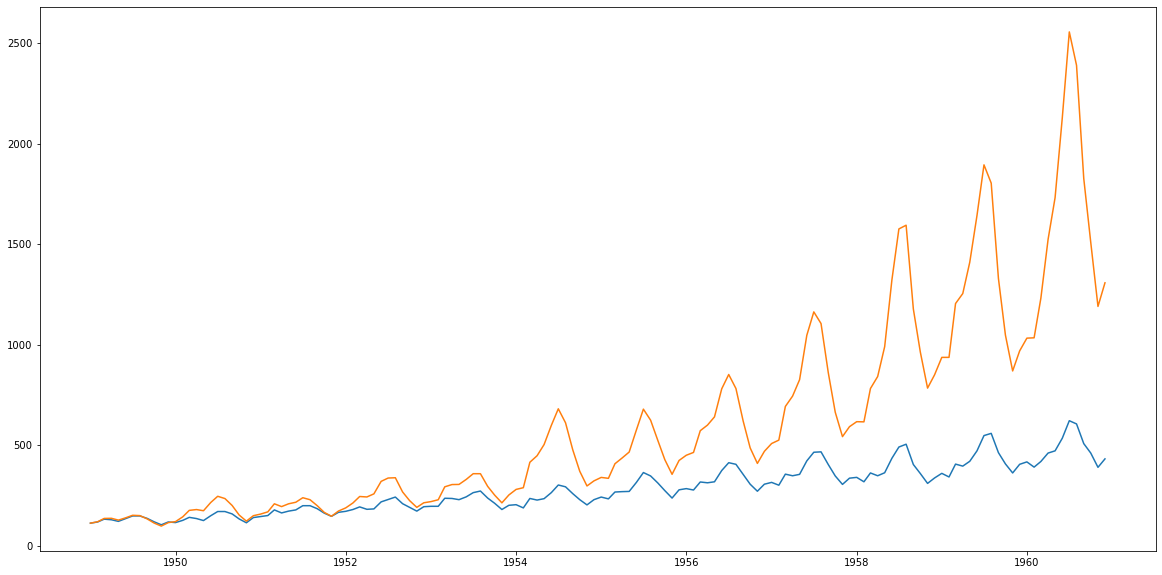

In [59]:
# Taking out log transformation and visualizing actual vs predicted value graph

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

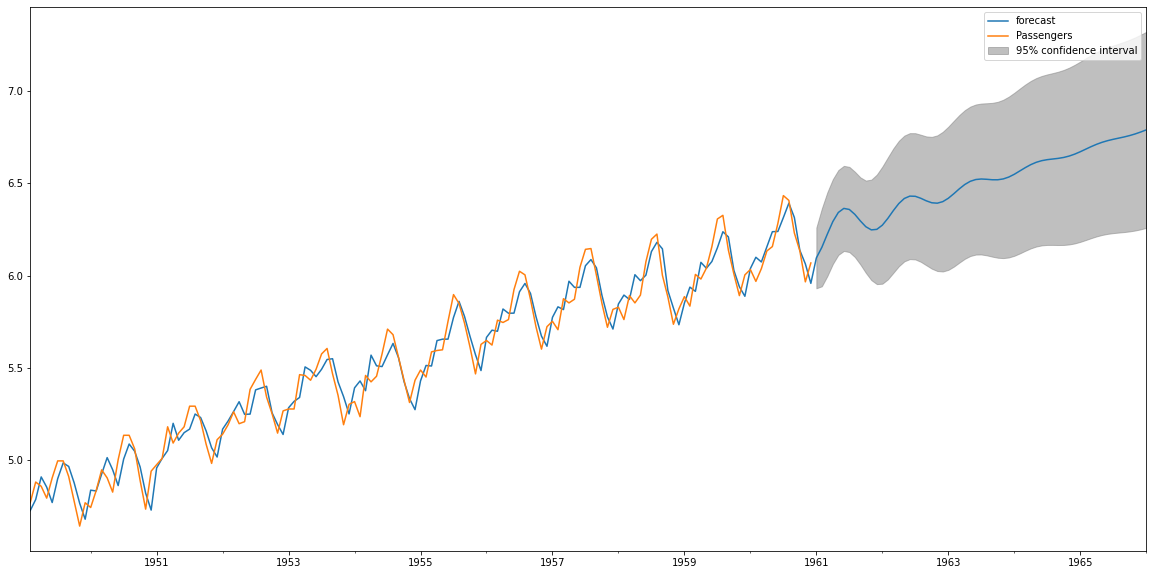

In [60]:
#- Plotting the visual for forecast of next 10 years with 95% confidence interval

rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [61]:
x[0]

array([6.09553386, 6.1528139 , 6.2244295 , 6.29241086, 6.34164705,
       6.36359356, 6.35784688, 6.33139312, 6.29597552, 6.26447726,
       6.24738334, 6.25025174, 6.27275832, 6.30940302, 6.3515148 ,
       6.38988643, 6.41727373, 6.43011051, 6.42906692, 6.41842496,
       6.40456165, 6.39403625, 6.39183089, 6.40019505, 6.41833689,
       6.44295401, 6.46937428, 6.49293979, 6.51024115, 6.51989034,
       6.52267583, 6.52112394, 6.51864535, 6.51853697, 6.52311928,
       6.53322363, 6.54812869, 6.56591555, 6.58410306, 6.60036538,
       6.61313266, 6.62192784, 6.62737793, 6.63093135, 6.63438696,
       6.63937991, 6.6469651 , 6.65739845, 6.67015327, 6.68414253,
       6.69806628, 6.71077903, 6.72157735, 6.73033988, 6.73749817,
       6.74386385, 6.7503733 , 6.757826  , 6.76668688, 6.77699829,
       6.78841324, 6.80032858, 6.81207199, 6.82308765, 6.83307142,
       6.84202499, 6.85022319, 6.85811229, 6.86617348, 6.87479159,
       6.8841631 , 6.89426391, 6.90487896, 6.91567945, 6.92632

In [62]:
np.exp(x[0])

array([ 443.87094502,  470.03817002,  504.93489556,  540.4547196 ,
        567.73062127,  580.32806029,  577.00266049,  561.9388999 ,
        542.38469597,  525.56677757,  516.6591335 ,  518.14324534,
        529.93709807,  549.71668139,  573.36058074,  595.78891261,
        612.33145307,  620.24248691,  619.59554671,  613.03679837,
        604.59671418,  598.26646501,  596.94852609,  601.96243876,
        612.98281035,  628.25994984,  645.07996067,  660.46213422,
        671.98844941,  678.50397322,  680.39657457,  679.34149496,
        677.65976915,  677.58632933,  680.6983647 ,  687.61124538,
        697.93689682,  710.46206419,  723.50181928,  735.36382724,
        744.81261579,  751.39226232,  755.49860443,  758.18798133,
        760.81251409,  764.62071558,  770.44255733,  778.5229311 ,
        788.51645239,  799.62472687,  810.83637512,  821.21013748,
        830.12587978,  837.43184698,  843.44792749,  848.83417884,
        854.37764293,  860.76884519,  868.42991314,  877.43097